In [1]:
import numpy as np
import os
import datetime
import pandas as pd
import random
from scipy import stats
# from tqdm import tqdm
from matplotlib import pyplot as plt
from matplotlib.colors import ListedColormap
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()
from sklearn import preprocessing
from sklearn import datasets
from sklearn import model_selection

In [2]:
from keras import models
from keras import layers
from keras import datasets as kDatasets
from keras import preprocessing as kpreprocess
from keras.utils import np_utils
from keras import regularizers
from keras import callbacks

Using TensorFlow backend.


### Visualize Training History

In [6]:
np.random.seed(0)
num_features = 10000
# Load data
(data_train, target_train), (data_test, target_test) = kDatasets.imdb.load_data(num_words=num_features)

In [7]:
# convert movie review to one hot
tokenizer = kpreprocess.text.Tokenizer(num_words=num_features)
features_train = tokenizer.sequences_to_matrix(data_train, mode='binary')
features_test = tokenizer.sequences_to_matrix(data_test, mode='binary')

In [8]:
# Neural net
network = models.Sequential()
network.add(layers.Dense(units=16, activation='relu', input_shape=(num_features, )))
network.add(layers.Dense(units=16, activation='relu'))
network.add(layers.Dense(units=1, activation='sigmoid'))
network.compile(loss='binary_crossentropy', optimizer='rmsprop', metrics=['accuracy'])

In [9]:
# Train
history = network.fit(features_train, target_train, epochs=15, verbose=0, batch_size=1000,
                      validation_data=(features_test, target_test))

Instructions for updating:
Use tf.cast instead.


In [11]:
train_loss = history.history['loss']
test_loss = history.history['val_loss']
epoch_count = range(1, len(train_loss) + 1)
train_acc = history.history['acc']
test_acc = history.history['val_acc']

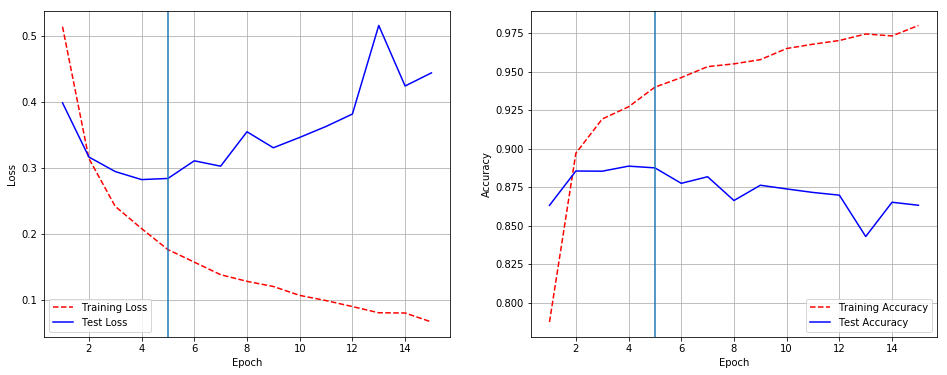

In [16]:
plt.figure(figsize=(16, 6))
plt.subplot(1, 2, 1)
plt.plot(epoch_count, train_loss, "r--")
plt.plot(epoch_count, test_loss, 'b-')
plt.axvline(5)
plt.grid()
plt.legend(["Training Loss", 'Test Loss'])
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.subplot(1, 2, 2)
plt.plot(epoch_count, train_acc, "r--")
plt.plot(epoch_count, test_acc, 'b-')
plt.axvline(5)
plt.grid()
plt.legend(["Training Accuracy", 'Test Accuracy'])
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.show()

Around 5 epoch the test data shows a decrease in accuracy andan increase in loss while the train set does better, indicating we are overfitting.

### Regularization to Fight Over-fitting

In [18]:
np.random.seed(0)
num_features = 1000
# Load data
(data_train, target_train), (data_test, target_test) = kDatasets.imdb.load_data(num_words=num_features)
# convert movie review to one hot
tokenizer = kpreprocess.text.Tokenizer(num_words=num_features)
features_train = tokenizer.sequences_to_matrix(data_train, mode='binary')
features_test = tokenizer.sequences_to_matrix(data_test, mode='binary')

In [20]:
# Neural net
network = models.Sequential()
network.add(layers.Dense(units=16, activation='relu', kernel_regularizer=regularizers.l2(0.01),
                         input_shape=(num_features, )))
network.add(layers.Dense(units=16, activation='relu', kernel_regularizer=regularizers.l2(0.01)))
network.add(layers.Dense(units=1, activation='sigmoid'))
network.compile(loss='binary_crossentropy', optimizer='rmsprop', metrics=['accuracy'])

In [21]:
# Train
history = network.fit(features_train, target_train, epochs=6, verbose=0, batch_size=100,
                      validation_data=(features_test, target_test))

In [ ]:
train_loss = history.history['loss']
test_loss = history.history['val_loss']
epoch_count = range(1, len(train_loss) + 1)
train_acc = history.history['acc']
test_acc = history.history['val_acc']

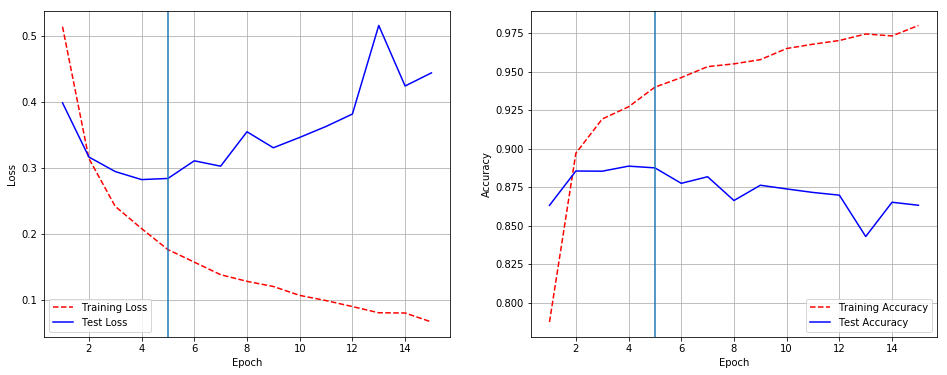

In [22]:
plt.figure(figsize=(16, 6))
plt.subplot(1, 2, 1)
plt.plot(epoch_count, train_loss, "r--")
plt.plot(epoch_count, test_loss, 'b-')
plt.axvline(5)
plt.grid()
plt.legend(["Training Loss", 'Test Loss'])
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.subplot(1, 2, 2)
plt.plot(epoch_count, train_acc, "r--")
plt.plot(epoch_count, test_acc, 'b-')
plt.axvline(5)
plt.grid()
plt.legend(["Training Accuracy", 'Test Accuracy'])
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.show()

### Early Stopping to Fight Over-Fitting

In [23]:
# Neural net
network = models.Sequential()
network.add(layers.Dense(units=16, activation='relu', input_shape=(num_features, )))
network.add(layers.Dense(units=16, activation='relu'))
network.add(layers.Dense(units=1, activation='sigmoid'))
network.compile(loss='binary_crossentropy', optimizer='rmsprop', metrics=['accuracy'])

In [27]:
my_callbacks = [callbacks.EarlyStopping(monitor='val_loss', patience=2),
               callbacks.ModelCheckpoint(filepath=r'best_model.h5', monitor='val_loss', save_best_only=True)]
# Train
history = network.fit(features_train, target_train, epochs=20, verbose=0, batch_size=100, callbacks=my_callbacks,
                      validation_data=(features_test, target_test))

- After the validation lass has not improved for two epochs, training is interrupted
- Save the best model after each epoch

In [29]:
train_loss = history.history['loss']
test_loss = history.history['val_loss']
epoch_count = range(1, len(train_loss) + 1)
train_acc = history.history['acc']
test_acc = history.history['val_acc']

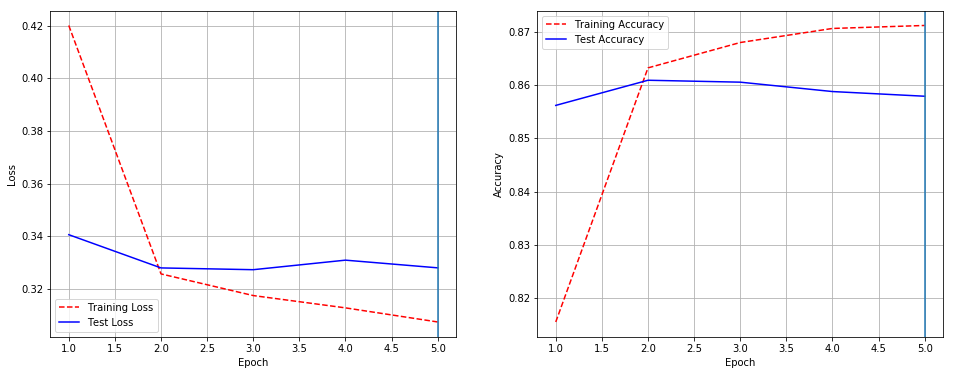

In [30]:
plt.figure(figsize=(16, 6))
plt.subplot(1, 2, 1)
plt.plot(epoch_count, train_loss, "r--")
plt.plot(epoch_count, test_loss, 'b-')
plt.axvline(5)
plt.grid()
plt.legend(["Training Loss", 'Test Loss'])
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.subplot(1, 2, 2)
plt.plot(epoch_count, train_acc, "r--")
plt.plot(epoch_count, test_acc, 'b-')
plt.axvline(5)
plt.grid()
plt.legend(["Training Accuracy", 'Test Accuracy'])
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.show()

### Dropout to Fight Over-Fitting
- Common Settings are 0.2 for input layer and 0.5 for hidden layer

In [31]:
# Neural net
network = models.Sequential()
network.add(layers.Dropout(0.2, input_shape=(num_features, )))
network.add(layers.Dense(units=16, activation='relu'))
network.add(layers.Dropout(0.5))
network.add(layers.Dense(units=16, activation='relu'))
network.add(layers.Dense(units=1, activation='sigmoid'))
network.compile(loss='binary_crossentropy', optimizer='rmsprop', metrics=['accuracy'])

Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [36]:
# Train
history = network.fit(features_train, target_train, epochs=15, verbose=0, batch_size=100,
                      validation_data=(features_test, target_test))
# History Data
train_loss = history.history['loss']
test_loss = history.history['val_loss']
epoch_count = range(1, len(train_loss) + 1)
train_acc = history.history['acc']
test_acc = history.history['val_acc']

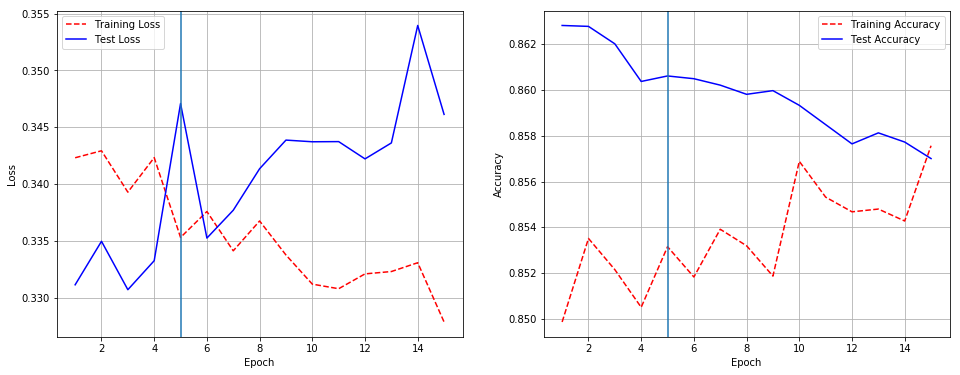

In [37]:
plt.figure(figsize=(16, 6))
plt.subplot(1, 2, 1)
plt.plot(epoch_count, train_loss, "r--")
plt.plot(epoch_count, test_loss, 'b-')
plt.axvline(5)
plt.grid()
plt.legend(["Training Loss", 'Test Loss'])
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.subplot(1, 2, 2)
plt.plot(epoch_count, train_acc, "r--")
plt.plot(epoch_count, test_acc, 'b-')
plt.axvline(5)
plt.grid()
plt.legend(["Training Accuracy", 'Test Accuracy'])
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.show()

### Saving Models
- callbacks parameter when fitting, pass a list
- my_callbacks = [callbacks.EarlyStopping(monitor='val_loss', patience=2),
               callbacks.ModelCheckpoint(filepath=r'best_model.h5', monitor='val_loss', save_best_only=True)]
- ModelCheckpoint specify what to monitor and if only the best saved
- Dynamic name: model_{epoch:02d}_{val_loss:.2f}.hdf5

### K-Fold Cross Validation
- often not necessary or advised as usually takes a long time to train a neural network and have plenty of data, but here is how...

In [38]:
from keras.wrappers.scikit_learn import KerasClassifier

In [39]:
np.random.seed(0)
num_features = 100
features, target = datasets.make_classification(n_samples=10000, n_features=num_features, n_informative=3, n_classes=2,
                                                n_redundant=0, weights=[0.5, 0.5], random_state=0)

In [50]:
def create_CV_network(feature_number=num_features, optimizer='rmsprop'):
    network = models.Sequential()
    network.add(layers.Dense(units=16, activation='relu', input_shape=(feature_number, )))
    network.add(layers.Dense(units=16, activation='relu'))
    network.add(layers.Dense(units=1, activation='sigmoid'))
    network.compile(loss='binary_crossentropy', optimizer='rmsprop', metrics=['accuracy'])
    return network

In [42]:
# wrap keras model so it can be used by scikit learn
my_nn = KerasClassifier(build_fn=create_CV_network, epochs=10, batch_size=100, verbose=0)
# Evaluate using 3-fold cross validation
model_selection.cross_val_score(my_nn, features, target, cv=3)

array([0.9040192 , 0.77797779, 0.87218722])

### Tuning Neural Networks

In [51]:
# wrap keras model so it can be used by scikit learn
my_nn = KerasClassifier(build_fn=create_CV_network, verbose=0)
hyperparameters = dict(optimizer = ['rmsprop', 'adam'], epochs =[5, 10], batch_size= [5, 10, 100])
# Evaluate using 3-fold cross validation
grid = model_selection.GridSearchCV(estimator=my_nn, param_grid=hyperparameters)
grid_result = grid.fit(features, target)

In [52]:
grid_result.best_params_

{'batch_size': 5, 'epochs': 5, 'optimizer': 'rmsprop'}

### Classifying Image

In [56]:
from keras import backend as K

In [57]:
np.random.seed(0)
channels = 1
height = 28
width = 28

In [60]:
(data_train, target_train), (data_test, target_test) = kDatasets.mnist.load_data()
print(data_train.shape)
# reshape image data into features
data_train = data_train.reshape(data_train.shape[0], channels, height, width)
data_test = data_test.reshape(data_test.shape[0], channels, height, width)
print(data_train.shape)

(60000, 28, 28)
(60000, 1, 28, 28)


In [61]:
# Rescale pixels between 0 and 1, and one_hot encode target
features_train = data_train / 255.0
features_test = data_test / 255.0
print(min(target_train), max(target_train), min(target_train), max(target_train))
target_train = np_utils.to_categorical(target_train)
target_test = np_utils.to_categorical(target_test)
num_classes = target_test.shape[1]

0 9 0 9


In [66]:
# network
network = models.Sequential()
# convolution with 64 filters, 5x5 window, and ReLU activation
network.add(layers.convolutional.Conv2D(filters=64, kernel_size=(5, 5), input_shape=(channels, width, height),
                                        activation='relu', data_format='channels_first'))
# max pooling wiwtha  2x2 window
network.add(layers.convolutional.MaxPooling2D(pool_size=(2, 2)))
# Drop out
network.add(layers.Dropout(0.5))
# Flatten
network.add(layers.Flatten())
# Add fully connected layer of 128 units with relu
network.add(layers.Dense(128, activation='relu'))
# Drop out
network.add(layers.Dropout(0.5))
# Soft Max final layer
network.add(layers.Dense(num_classes, activation='softmax'))
network.compile(loss="categorical_crossentropy", optimizer='rmsprop', metrics=['accuracy'])

In [69]:
history = network.fit(features_train, target_train, epochs=3, verbose=1, batch_size=1000,
                      validation_data=(features_test, target_test))
# History Data
train_loss = history.history['loss']
test_loss = history.history['val_loss']
epoch_count = range(1, len(train_loss) + 1)
train_acc = history.history['acc']
test_acc = history.history['val_acc']

Train on 60000 samples, validate on 10000 samples
Epoch 1/3
60000/60000 [==============================] - 125s 2ms/step - loss: 0.6436 - acc: 0.7974 - val_loss: 0.1976 - val_acc: 0.9475
Epoch 2/3
60000/60000 [==============================] - 150s 2ms/step - loss: 0.2203 - acc: 0.9355 - val_loss: 0.1041 - val_acc: 0.9689
Epoch 3/3
60000/60000 [==============================] - 123s 2ms/step - loss: 0.1416 - acc: 0.9586 - val_loss: 0.0710 - val_acc: 0.9769


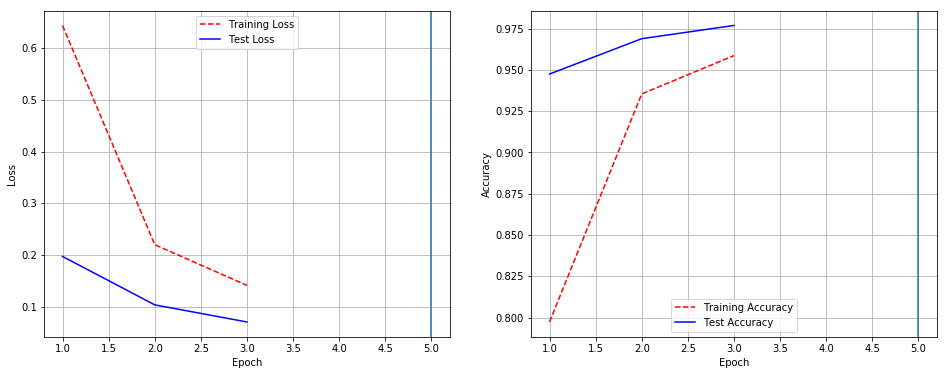

In [70]:
plt.figure(figsize=(16, 6))
plt.subplot(1, 2, 1)
plt.plot(epoch_count, train_loss, "r--")
plt.plot(epoch_count, test_loss, 'b-')
plt.axvline(5)
plt.grid()
plt.legend(["Training Loss", 'Test Loss'])
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.subplot(1, 2, 2)
plt.plot(epoch_count, train_acc, "r--")
plt.plot(epoch_count, test_acc, 'b-')
plt.axvline(5)
plt.grid()
plt.legend(["Training Accuracy", 'Test Accuracy'])
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.show()

In [71]:
pred_test = network.predict(features_test)

In [75]:
for a, p in zip(target_test[:5], pred_test[:5]):
    a = np.array(a)
    p = np.array(p)
    a_ind = np.argmax(a)
    p_ind = np.argmax(p)
    print('Actual: {2}-{0}, Pred: {3}-{1}'.format(a[a_ind], p[p_ind], a_ind, p_ind))

Actual: 7-1.0, Pred: 7-0.9999219179153442
Actual: 2-1.0, Pred: 2-0.9998972415924072
Actual: 1-1.0, Pred: 1-0.999232292175293
Actual: 0-1.0, Pred: 0-0.9997310042381287
Actual: 4-1.0, Pred: 4-0.9960960745811462


### Improve Performance with Image Augmentation
- Noise is often helpful in neural networks because helps with overfitting and more robust

In [ ]:
augmentation = kpreprocess.image.ImageDataGenerator(featurewise_center=True, zoom_range=0.3, width_shift_range=0.2,
                                                   horizontal_flip=True, rotation_range=90)
augment_images = augmentation.flow_from_directory("raw/images", batch_size=32, class_mode='binary',
                                                  save_to_dir='processed/images')
# Outputs a generator, so also need to use the fit_generator
# calls the generator 2000 times per epoch and 800 in test
network.fit_generator(augment_images, steps_per_epoch=2000, epochs=5, validation_data=augment_images_test,
                      validation_steps=800)

### Classifying Text

In [76]:
np.random.seed(0)
num_features = 1000
# Load data
(data_train, target_train), (data_test, target_test) = kDatasets.imdb.load_data(num_words=num_features)

In [81]:
# Pdding or truncation to make each observation have 400 features
print([len(x) for x in data_train[:10]])
features_train = kpreprocess.sequence.pad_sequences(data_train, maxlen=400)
features_test = kpreprocess.sequence.pad_sequences(data_test, maxlen=400)

[218, 189, 141, 550, 147, 43, 123, 562, 233, 130]


In [82]:
# Build Model
network = models.Sequential()
network.add(layers.Embedding(input_dim=num_features, output_dim=128))
network.add(layers.LSTM(units=128))
network.add(layers.Dense(units=1, activation='sigmoid'))
network.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [83]:
history = network.fit(features_train, target_train, epochs=5, verbose=1, batch_size=1000,
                      validation_data=(features_test, target_test))
# History Data
train_loss = history.history['loss']
test_loss = history.history['val_loss']
epoch_count = range(1, len(train_loss) + 1)
train_acc = history.history['acc']
test_acc = history.history['val_acc']

Train on 25000 samples, validate on 25000 samples
Epoch 1/5
25000/25000 [==============================] - 1015s 41ms/step - loss: 0.6792 - acc: 0.5997 - val_loss: 0.6596 - val_acc: 0.5953
Epoch 2/5
25000/25000 [==============================] - 1026s 41ms/step - loss: 0.6331 - acc: 0.6706 - val_loss: 0.5897 - val_acc: 0.7265
Epoch 3/5
25000/25000 [==============================] - 1280s 51ms/step - loss: 0.4747 - acc: 0.7834 - val_loss: 0.4176 - val_acc: 0.8156
Epoch 4/5
25000/25000 [==============================] - 991s 40ms/step - loss: 0.3933 - acc: 0.8304 - val_loss: 0.3865 - val_acc: 0.8310
Epoch 5/5
25000/25000 [==============================] - 1108s 44ms/step - loss: 0.3591 - acc: 0.8504 - val_loss: 0.3631 - val_acc: 0.8418


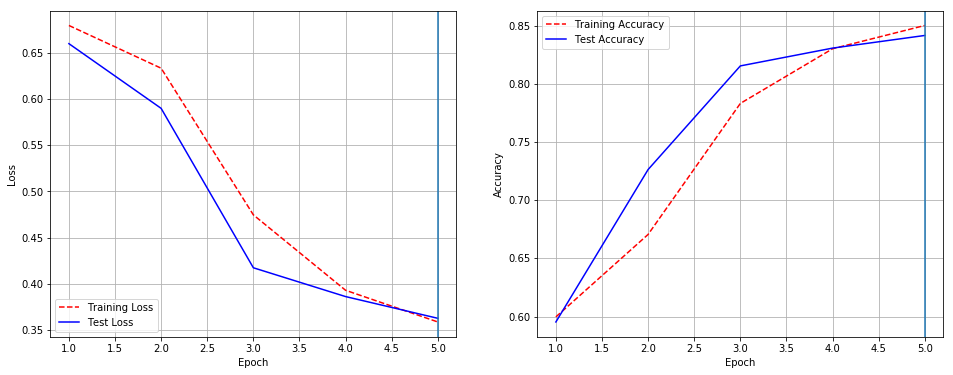

In [84]:
plt.figure(figsize=(16, 6))
plt.subplot(1, 2, 1)
plt.plot(epoch_count, train_loss, "r--")
plt.plot(epoch_count, test_loss, 'b-')
plt.axvline(5)
plt.grid()
plt.legend(["Training Loss", 'Test Loss'])
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.subplot(1, 2, 2)
plt.plot(epoch_count, train_acc, "r--")
plt.plot(epoch_count, test_acc, 'b-')
plt.axvline(5)
plt.grid()
plt.legend(["Training Accuracy", 'Test Accuracy'])
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.show()

### Visualizing

In [3]:
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot
from keras.utils import plot_model

In [4]:
network = models.Sequential()
network.add(layers.Dense(units=16, activation='relu', input_shape=(10, )))
network.add(layers.Dense(units=16, activation='relu'))
network.add(layers.Dense(units=1, activation='sigmoid'))
SVG(model_to_dot(network, show_shapes=True)).create(prog="dot", format="svg")

Instructions for updating:
Colocations handled automatically by placer.


TypeError: a bytes-like object is required, not 'Dot'

In [5]:
plot_model(network, show_shapes=True, to_file="network.png")